<a href="https://colab.research.google.com/github/Cherow/Mercy_Cherotich_week7_datasciencecore_moringa_school/blob/main/Mercy_cherotich_moringaschool_week7core_independentproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Week 7 independent project

## 1. Defining the Question

### a) Specifying the Question


> Hass consultacy company has given the duty to study the factors that affect housing prices using the information given and later create a model that would accurately predict the sale prices of the house upon given the the input



### b) Defining the Metric for Success

The metric of success will be measured using adjusted R2  and RMSE.

### c) Understanding the context 

knowning the factors that affect house pricing and their impact on the house price is important to the buyers and sellers of the house.
The seller will be able to know what factor greately affect the price and focus on improving it in order to maximize profits.
the buyer will also be able to decide on what to buy based on given factors since they know how it affects the price

### d) Recording the Experimental Design

The experimental design to be employed is the CRISP-DM
design

### e) Data Relevance

The data we had is relevant and up to date

## 2. Reading the Data

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset
url = '/content/Independent Project Week 7 - house_data.csv'
#
housing_df = pd.read_csv(url)

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
housing_df.shape

(21613, 20)

In [4]:
# Previewing the top of our dataset
#
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Previewing the bottom of our dataset
# 
housing_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Checking whether each column has an appropriate datatype
#
housing_df.info()
#the data contain appropriate datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
#checking for unique values
housing_df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [8]:
#dropping the id column since we wont need it  and the lat and long columns we will use the zipcode to get location
housing_df.drop(['id','lat','long'],1,inplace=True)
housing_df.head(1)



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650


In [9]:
# Identifying the Missing Data
#
housing_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

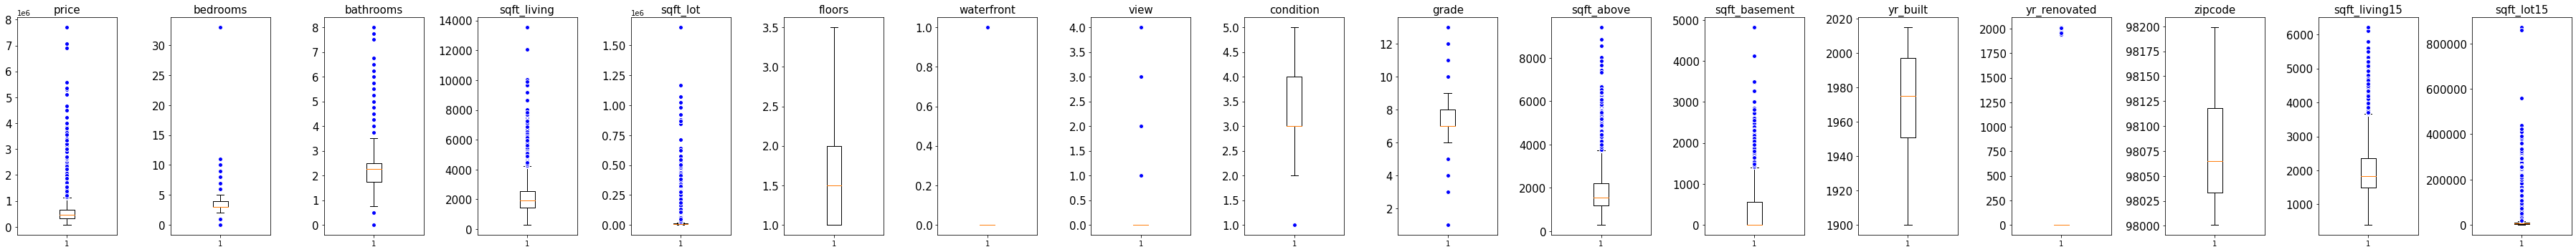

In [10]:
#checking for outliers
housing_df.head()
blue_circle = dict(markerfacecolor = 'blue', marker='o',markeredgecolor = 'white')
fig,axs = plt.subplots(1, len(housing_df.columns),figsize = (50,5))
for i , ax in enumerate (axs.flat):
  ax.boxplot(housing_df.iloc[:,i],flierprops=blue_circle)
  ax.set_title(housing_df.columns[i],fontsize= 15)
  ax.tick_params(axis = 'y',labelsize = 15)
plt.tight_layout()
#our data contains outliers but we wont remove them  since they are source of variations in our data 

In [12]:
# Dealing with the Missing Data
#our data has no missing values 

In [11]:
# checking for duplicates 
#
housing_df.duplicated().sum()
#checking the duplicates
duplicate = housing_df[housing_df.duplicated()]
duplicate
#checking the duplicates we realised they is no need to drop them since the duplicates were not in all columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,1510,1352
21474,359800.0,5,2.50,2170,2752,2.0,0,0,3,8,2170,0,2014,0,98106,1800,2752


In [12]:
#since we are doing the study now we will get the difference between the year the house was build and now to otain the age
housing_df['house_age'] = 2021-housing_df['yr_built']
housing_df.head()
#we also get how old the house is since renovation
housing_df['renovation_age']  = 2021 - housing_df['yr_renovated']
housing_df['renovation_age'].replace({2021:0},inplace = True)
housing_df.head()
#we then drop the yr_build and yr_renovated age since we already have the age of the house
housing_df.drop(['yr_built','yr_renovated'],1,inplace=True)


## 6. Exploratory Analysis

1.Univariate Analysis

In [13]:
# Ploting the univariate summaries and recording our observations
#
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age,renovation_age
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,1986.552492,12768.455652,49.994864,1.064544
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,685.391304,27304.179631,29.373411,5.986431
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,399.000000,651.000000,6.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,24.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,46.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,70.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,121.000000,87.000000


1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64


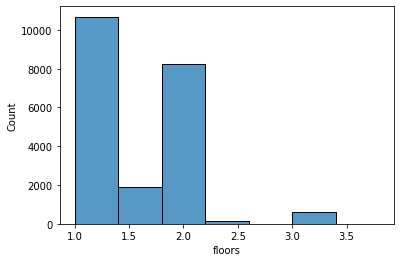

In [16]:
#frquency table for unique values in floors and visualizing it
print(housing_df['floors'].value_counts())
sns.histplot(housing_df['floors'],bins = 6,binwidth=0.4)
#most have houses have 1 floors

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


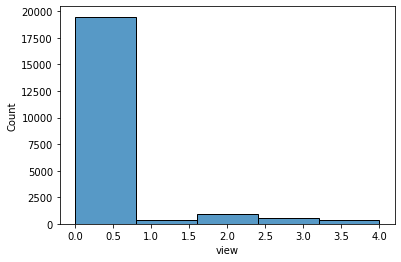

In [17]:
#frequency table for unique values in view column and visualization
print(housing_df['view'].value_counts())
sns.histplot(housing_df['view'],bins = 5)
# most houses seems to be having 0 views

0    21450
1      163
Name: waterfront, dtype: int64


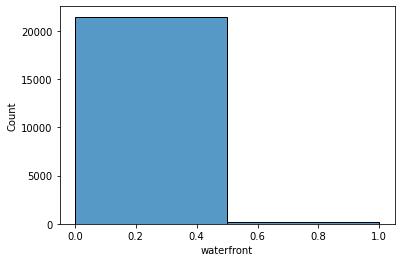

In [18]:
#frquency table for unique values in waterfront  column 
print(housing_df['waterfront'].value_counts())
#visualising  the frequency table
sns.histplot(housing_df['waterfront'], bins = 2)
#most houses dont have waterfront

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


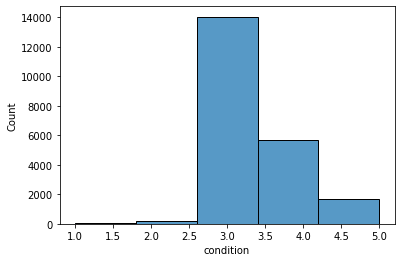

In [19]:
#frequency table for unique values in the condition column
print(housing_df['condition'].value_counts())
#visualising
sns.histplot(housing_df['condition'],bins = 5)
#most houses are in the 3rd condition

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


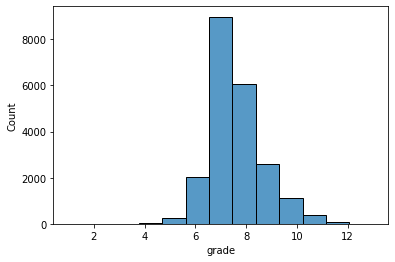

In [20]:
#value count of unique values in grade column
print(housing_df['grade'].value_counts())
#visualising the frequency table
sns.histplot(housing_df['grade'],bins = 13)

In [21]:
#frequency table for zip code column
housing_df['zipcode'].value_counts()
#most houses are located in area code 98103

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [22]:
#frequency table for bedroom column
housing_df['bedrooms'].value_counts()
#most houses have 3 bedrooms


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [23]:
#frequency table for bathroom column
housing_df['bathrooms'].value_counts()
#most houses seems to be having 2.5 bathroom

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [14]:
#finding kyrtosis
housing_df.kurt()
#the sqft_lot,price,bedrooms,waterfront,view,sqft_lot15 and renovation age are leptokurtic  as they have high kurtosis
#the zipcode,floors,condition,house age are platykurtic as they have low kurtosis

price              34.522444
bedrooms           49.063653
bathrooms           1.279902
sqft_living         5.243093
sqft_lot          285.077820
floors             -0.484723
waterfront        127.632494
view               10.893022
condition           0.525764
grade               1.190932
sqft_above          3.402304
sqft_basement       2.715574
zipcode            -0.853479
sqft_living15       1.597096
sqft_lot15        150.763110
house_age          -0.657408
renovation_age     55.431446
dtype: float64

In [25]:
# finding skweness
housing_df.skew()
#most variables are highly skwed to the right as they have skewness of value greater than 2

price              4.021716
bedrooms           1.974300
bathrooms          0.511108
sqft_living        1.471555
sqft_lot          13.060019
floors             0.616177
waterfront        11.385108
view               3.395750
condition          1.032805
grade              0.771103
sqft_above         1.446664
sqft_basement      1.577965
zipcode            0.405661
sqft_living15      1.108181
sqft_lot15         9.506743
house_age          0.469805
renovation_age     6.946667
dtype: float64

2.Bivariate Analysis

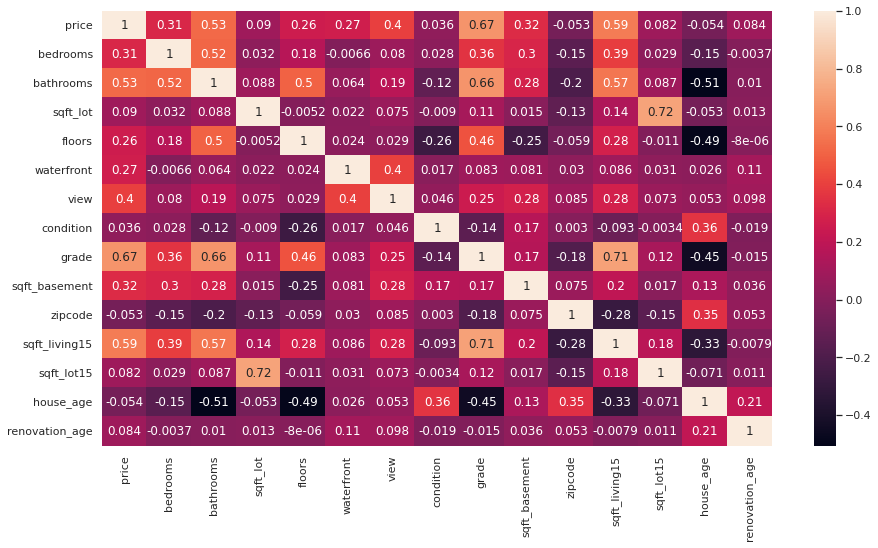

In [24]:
#correlation matrix
matrix = housing_df.corr()
matrix
#visualising correlation using heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix,annot=True)

In [23]:
#removing columns with high correlation
housing_df.drop(['sqft_living','sqft_above'],axis =1,inplace=True)

In [25]:
#finding the VIF of the variables
pd.DataFrame(np.linalg.inv(matrix.values), index = matrix.index, columns=matrix.columns)
#there is multicollinearity since they variables with VIF greater than 5
#we drop all the columns with VIF greater than 5
#sqft_living and sqft_above have VIF greater than 5 hence we drop sqft_above since it has a lower correlation than sqft_living
#sqft_living has VIF greater than 5 so we drop it

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age,renovation_age
price,2.677256,0.091974,-0.518737,-0.045161,-0.201110,-0.389666,-0.236547,-0.075919,-1.328043,-0.263294,0.025046,-0.439008,0.066528,-0.862498,0.011622
bedrooms,0.091974,1.492863,-0.703265,0.004628,-0.036892,0.028847,0.106511,-0.050740,0.001752,-0.240975,0.103283,-0.271750,0.050243,-0.222791,0.038228
bathrooms,-0.518737,-0.703265,3.091107,-0.066635,-0.766802,0.055218,0.012684,-0.082496,-0.432588,-0.681577,0.038080,-0.213870,0.006377,0.929992,-0.181718
sqft_lot,-0.045161,0.004628,-0.066635,2.080577,0.044362,0.031062,-0.052341,0.028439,-0.061127,0.041073,0.064818,0.073213,-1.482897,-0.048313,0.000514
floors,-0.201110,-0.036892,-0.766802,0.044362,1.958693,0.014506,-0.013009,0.110077,-0.342105,0.742682,-0.256442,0.179113,0.064758,0.434704,-0.083862
waterfront,-0.389666,0.028847,0.055218,0.031062,0.014506,1.260042,-0.458778,0.000924,0.203192,0.062260,0.012076,0.091762,-0.030863,0.135325,-0.084654
view,-0.236547,0.106511,0.012684,-0.052341,-0.013009,-0.458778,1.440315,-0.018810,-0.041903,-0.242479,-0.144282,-0.247210,-0.008701,-0.065660,-0.043703
condition,-0.075919,-0.050740,-0.082496,0.028439,0.110077,0.000924,-0.018810,1.226170,0.024751,-0.095667,0.171572,0.096200,-0.027443,-0.473697,0.127322
grade,-1.328043,0.001752,-0.432588,-0.061127,-0.342105,0.203192,-0.041903,0.024751,3.446011,0.017513,-0.124265,-1.133148,0.014843,0.741031,-0.007628
sqft_basement,-0.263294,-0.240975,-0.681577,0.041073,0.742682,0.062260,-0.242479,-0.095667,0.017513,1.629163,-0.186576,0.045275,0.007800,-0.117988,0.019903


In [26]:
 # Separating our target label (price) from the other features
features= housing_df.drop(['price'], 1)
house_label = housing_df['price']

# Subject our features to LDA model



# Create an instance of LDA
lda = LDA()

lda_= lda.fit(features, house_label)
lda_feat = lda_.transform(features)

# Display the coeficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=features.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
floors,1.844303
renovation_age,0.009398
sqft_living15,0.002033
sqft_basement,0.001857
sqft_lot15,0.000043
sqft_lot,-0.000002
view,-0.020798
zipcode,-0.029440
house_age,-0.159228
bedrooms,-1.683580


## 7. Implementing the Solution

1.Multiple linear regression

In [27]:
# Implementing the Solution
# 
#we split our data into label and features
X = housing_df.drop(['price'],axis = 1)
y = housing_df['price']

#we split train and test ,test = 30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 0)
#we train model using regression
reg = LinearRegression()
reg.fit(X_train,y_train)
#we make prediction
y_pred = reg.predict(X_test)
#getting the linear coefficients
X = pd.DataFrame(X)
coeff_linear = pd.DataFrame(reg.coef_,X.columns,columns=['corfficients'])
coeff_linear

,corfficients
bedrooms,-10441.630061
bathrooms,85041.892680
sqft_lot,0.237310
floors,54365.597080
waterfront,630681.021372
view,43533.307166
condition,16620.114811
grade,153035.000289
sqft_basement,83.682362
zipcode,-2.383293


In [28]:
#validating our model using R2 and RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('Root Mean Squared Error:', metrics.r2_score(y_test, y_pred))
#our variables describe 61% of our output variables which is not a very good value
#the RMSE value is also quite very high

Root Mean Squared Error: 231495.69006997565
Root Mean Squared Error: 0.6101423065961382


checking heteroscedasticity using Bartlett’s test

In [30]:
residuals = np.subtract(y_pred, y_test)

pd.DataFrame(residuals).describe()

,price
count,6.484000e+03
mean,6.037783e+02
std,2.315128e+05
min,-4.731746e+06
25%,-8.577551e+04
50%,1.451848e+04
75%,1.126574e+05
max,1.329609e+06


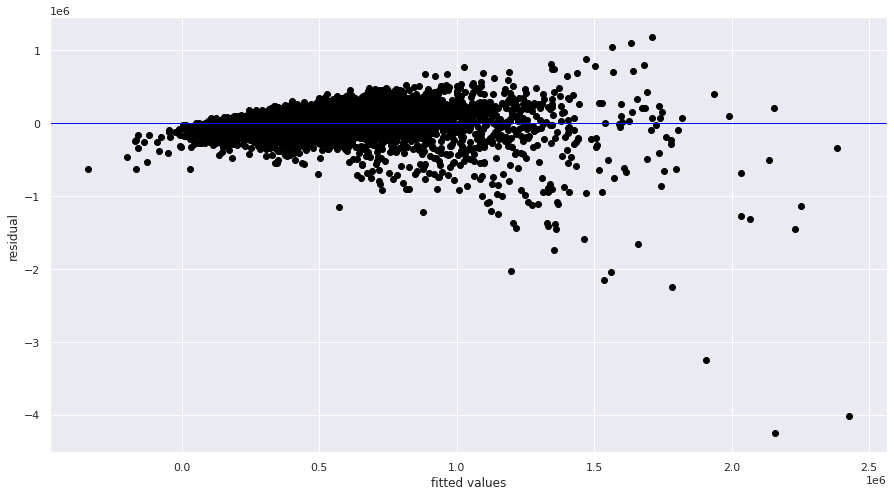

In [29]:
#plotting residual against fitted values
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue', linewidth=1)
plt.show()
#our residuals are centered around the mean hence  the residuals have homogeneoues variance

In [31]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')
#from the test we conclude that the variance are homogeneous

the variances are homogeneous!


In [32]:
z = housing_df.drop(['price'],axis  = 1)

2.Quantile regression

In [56]:
#finding the regression coefficients  
model = smf.quantreg('y ~ z', housing_df)
res = model.fit(q=.5)
print(res.summary())
#this are the coefficients of the variables at the 50th percentile
# the coefficients for the variables are not the same as those for the the linear model
#hence the use of quantile is justified
#when stating the impact of the variables on the output we should include at nth quantile
#our pseudo R- squared is between 0.2 and 0.4 hence means that our model has perfectly fitted the model

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3832
Model:                       QuantReg   Bandwidth:                   2.417e+04
Method:                 Least Squares   Sparsity:                    3.547e+05
Date:                Sat, 27 Nov 2021   No. Observations:                21613
Time:                        17:00:30   Df Residuals:                    21598
                                        Df Model:                           14
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0262      1.387    -12.996      0.000     -20.745     -15.307
z[0]       -1.132e+04   1578.722     -7.171      0.000   -1.44e+04   -8226.642
z[1]        4.986e+04   2708.141     18.410      0.000    4.45e+04    5.52e+04
z[2]           0.2099      0.042      5.002      0.0

2.ridge regression


In [33]:
#we use normalize as true in order to get better estimates 
#our estimator is the ridge and we are using cross validation of 10 folds to get the best value of our alpha and the best estimate score for our 
#metricd that is the mean square error
#we are using the gridsearchcv for our cross validation
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-1,6,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, estimator=Ridge(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             scoring='neg_mean_squared_error')

In [34]:
#we search for the best value for alpha and the best score
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.1}
a =abs(search.best_score_) 
np.sqrt(a)
#the rmse is 223697.15 which is better than the baseline model rmse which was 231495 and the alpha is 0.1


223697.15278105694

In [38]:
#we fit the ridge model and use it to make prediction and find the rmse
ridge = Ridge(normalize=True,alpha=0.1)
ridge.fit(X_train,y_train)
second_model = np.sqrt((mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test))))
print(second_model)
#the rmse is 226069 which is better than our baseline model rmse
ridge.coef_
#comparing the coefficients for ridge model and linear model
coeff2 = pd.DataFrame(ridge.coef_,X.columns,columns=['coefficient'])
coeff2
a = pd.concat([coeff_linear,coeff2],axis = 1)
print('R2:',metrics.r2_score(y_test,ridge.predict(X_test)))
print(a)
#the r2 and the rmse are worse that the one for the baseline model hence the ridge model has not really done a good job
#the coefficients are not very different since the rmse and r2 are almost the same

233738.98775614696
R2: 0.6025499031693007
                 corfficients    coefficient
bedrooms        -10441.630061   -2488.156866
bathrooms        85041.892680   76765.238493
sqft_lot             0.237310       0.200008
floors           54365.597080   52721.286273
waterfront      630681.021372  576307.014231
view             43533.307166   49522.244562
condition        16620.114811   21813.933795
grade           153035.000289  128053.695273
sqft_basement       83.682362      85.486173
zipcode             -2.383293      84.769882
sqft_living15       91.038870     100.651644
sqft_lot15          -0.396287      -0.283730
house_age         3940.021126    3042.699015
renovation_age    -376.907538     409.190800


3.lasso regression

In [39]:
#we use normalize as true in order to get better estimates 
#our estimator is the ridge and we are using cross validation of 10 folds to get the best value of our alpha and the best estimate score for our 
#metricd that is the mean square error
#we are using the gridsearchcv for our cross validation
lasso = Lasso(normalize=True)
search = GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(0,7,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search


GridSearchCV(cv=10, estimator=Lasso(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07])},
             scoring='neg_mean_squared_error')

In [40]:
#we now get the best apha value and best score for our model
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.1}
a =abs(search.best_score_) 
np.sqrt(a)
#the alpha is 0.1 and the rmse is 222228 which is better that the basemodel rmse

222228.57464788138

In [43]:
#fitting the lasso model to the data and testing it
lasso = Lasso(normalize=True,alpha=0.1)
lasso.fit(X_train,y_train)
second_model = np.sqrt((mean_squared_error(y_true=y_test,y_pred=lasso.predict(X_test))))
print(second_model)
#the rmse is 231496 which is better than our baseline model rmse
lasso.coef_
#comparing the coefficients for lasso model and linear model
coeff = pd.DataFrame(lasso.coef_,X.columns,columns=['coefficient'])
coeff
a = pd.concat([coeff_linear,coeff],axis = 1)
print('r2:',metrics.r2_score(y_test,lasso.predict(X_test)))
#r2 is 61% same as the baseline r2 meaning our model has done little difference
print(a)
#the co-efficients are nearly the same for the lasso and the linear meaning the model has little difference

231496.25177572056
r2: 0.6101404146769263
                 corfficients    coefficient
bedrooms        -10441.630061  -10404.760632
bathrooms        85041.892680   85013.376926
sqft_lot             0.237310       0.236237
floors           54365.597080   54313.197503
waterfront      630681.021372  630568.315117
view             43533.307166   43533.490044
condition        16620.114811   16611.087813
grade           153035.000289  153032.803802
sqft_basement       83.682362      83.646652
zipcode             -2.383293      -1.919859
sqft_living15       91.038870      91.025127
sqft_lot15          -0.396287      -0.394498
house_age         3940.021126    3938.545634
renovation_age    -376.907538    -373.309989


4.elastic net regression

In [45]:
#we normalize the data in order to get better estimates
# the parameter we are getting is alpha and l1_ratio which is the ratio of l1 to l2 since elastic has both l1 and l2 penalty
#the scoring we are getting is the mse.we are finding it using crossvalidation with 10 folds using the gridsearch
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-3,4,8),'l1_ratio':[.1,.3,.5,.7]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [50]:
#getting the best value for the apha,l1 ratio and the score
search.fit(X_train,y_train)
search.best_params_
a = abs(search.best_score_)
np.sqrt(a)
#the apha is 0.001 and l1 ratio is o.7
#the rmse is 292309 which is worse than our baseline rmse

{'alpha': 0.001, 'l1_ratio': 0.7}

In [54]:
#fitting the model to our data and testing it
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.7)
elastic.fit(X_train,y_train)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,elastic.predict(X_test))))
print('R2:',metrics.r2_score(y_test,elastic.predict(X_test)))
#the rmse is worse than the basemodel and
#r2 is 32% which is very low meaning our model has not performed very well

89098383213.66492
rmse: 304138.317204418
R2: 0.32708134748470774


## 8. Challenging the solution

>The baseline model was  linear regression but it had a R2 of 62% which 
was not a good accuracy so we challenge solution using quantile,lasso,ridge and net elastic.The other models did not fit our data well except for the quantile  regression at the 50th percentile which had a pseudo r square of 0.3 which is between 0.2 and 0.4 thus a good fit for our data






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

yes we had the right data that answered our questions hence we could predict house price given the various input variables

### b). Do we need other data to answer our question?

yes we needed more data to answer our questions especially to know the areas of the given zipcode in order to know where houses are most expensive and where least expensive

### c). Did we have the right question?

yes we had the right questions as this model will help sellers and buyers to determine the price of house given various factors